In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler 

In [46]:
class LinearRegressionScratch:
    W = None
    w0 = None
    learning_rate = None
    iterations = None
    errorList = []
    
    def __init__(self, learning_rate, iterations):
        self.learning_rate = learning_rate
        self.iterations = iterations
        
    def predict(self, X):
        return X.dot(self.W) + self.w0

    def score(self, X, y):
        ss_res = np.sum((y - self.predict(X)) ** 2)
        ss_mean = np.sum((y-np.mean(y))**2)
        try:
            r2Score = 1 - (ss_res / ss_mean)
        except ZeroDivisionError:
            print("ZeroDivisionError Occured")
            r2Score = 0

        return r2Score            
        
    def updateWeights(self, X, y):
        error = y- self.predict(X)
        dW = - ( 2 * (X.T).dot(error))/X.shape[0]
        dw0 = - 2 * np.sum(error)/X.shape[0]
        
        self.W = self.W - self.learning_rate * dW
        self.w0 = self.w0 - self.learning_rate * dw0

    def fit(self, X, y):
        self.W = np.random.randn(X.shape[1], 1)
        self.w0 = np.random.randn(1)
        self.errorList = []
        for i in range(self.iterations):
            self.updateWeights(X, y)
            ypred = self.predict(X)
            mse = np.mean((y - ypred) ** 2)
            self.errorList.append(mse)
    
    def give_errorList(self):
        return self.errorList

In [47]:
df_org = pd.read_csv("C:/Study/gitRepo/cars24_LR/cars24-price-predictions/NoteBooks/otherTrials/cars24-car-price-cleaned.csv")

In [48]:
df = df_org.copy()
df["make"] = df.groupby(by="make")["selling_price"].transform("mean")
df["model"] = df.groupby(by="model")["selling_price"].transform("mean")

df.head(1)

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,1.2,2012.0,120000,19.7,796.0,46.3,11.0,4.684721,1.18,1,0,0,0,0,1,1,1,0


In [49]:
MM_scale = MinMaxScaler()
df = pd.DataFrame(MM_scale.fit_transform(df), columns=MM_scale.get_feature_names_out())

C:\Users\saivarshith\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\numpy\_core\fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
C:\Users\saivarshith\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\numpy\_core\fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
C:\Users\saivarshith\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\P

<Axes: >

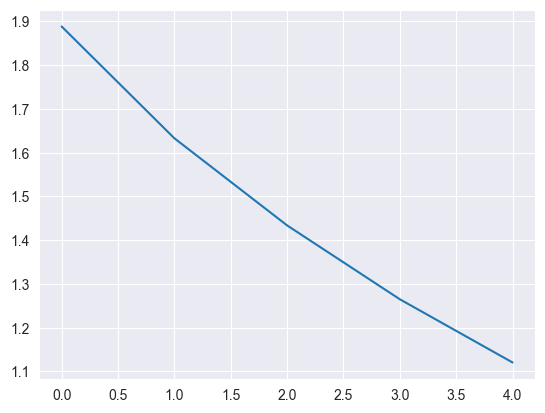

In [51]:
X = df.drop(columns="selling_price")
y = df["selling_price"]

lrModel = LinearRegressionScratch(learning_rate=0.01, iterations=5)
lrModel.fit(X=X, y=y)

sns.lineplot(data=lrModel.errorList)